# Youtube Trending Videos: Data Analysis

## Importing the required libraries

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import wordcloud

## Importing the dataset 

The dataset is a daily record of the top trending YouTube videos in India.

The data has 37352 entries.

It contains 16 columns:

 0.   video_id                
 1.   trending_date                
 2.   title                    
 3.   channel_title                 
 4.   category_id                   
 5.   publish_time   
 6.   tags                        
 7.   views                      
 8.   likes                         
 9.   dislikes                         
 10.  comment_count                      
 11.  thumbnail_link                      
 12.  comments_disabled                    
 13.  ratings_disabled                     
 14.  video_error_or_removed            
 15.  description

In [ ]:
df = pd.read_csv('INvideos.csv', parse_dates=["publish_time"])

In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


In [ ]:
df.tail()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
37347,iNHecA3PJCo,18.14.06,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,2018-06-13 08:01:11+00:00,"twinkle vaishnav comedy|""twinkle vaishnav""|""tw...",214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg,False,False,False,PRG Music & RDC Rajasthani presents फेकू आशिक़...
37348,dpPmPbhcslM,18.14.06,Seetha | Flowers | Ep# 364,Flowers TV,24,2018-06-13 11:30:04+00:00,"flowers serials|""actress""|""malayalam serials""|...",406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg,False,False,False,"Flowers - A R Rahman Show,Book your Tickets He..."
37349,mV6aztP58f8,18.14.06,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,2018-06-13 05:00:02+00:00,"mazhavil manorama|""bhramanam full episode""|""gt...",386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg,False,False,False,Subscribe to Mazhavil Manorama now for your da...
37350,qxqDNP1bDEw,18.14.06,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,2018-06-13 15:07:49+00:00,"tarang|""tarang tv""|""tarang tv online""|""tarang ...",130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg,False,False,False,Nuabohu : Story of a rustic village girl who w...
37351,wERgpPK44w0,18.14.06,Ee Nagaraniki Emaindi Trailer | Tharun Bhascke...,Suresh Productions,24,2018-06-10 04:29:54+00:00,"Ee Nagaraniki Emaindi|""Ee Nagaraniki Emaindi T...",1278249,22466,1609,1205,https://i.ytimg.com/vi/wERgpPK44w0/default.jpg,False,False,False,Check out Ee Nagaraniki Emaindi Trailer #EeNag...


## Data Preprocessing, Cleaning

In [ ]:
df.shape

(37352, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37352 entries, 0 to 37351
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   video_id                37352 non-null  object             
 1   trending_date           37352 non-null  object             
 2   title                   37352 non-null  object             
 3   channel_title           37352 non-null  object             
 4   category_id             37352 non-null  int64              
 5   publish_time            37352 non-null  datetime64[ns, UTC]
 6   tags                    37352 non-null  object             
 7   views                   37352 non-null  int64              
 8   likes                   37352 non-null  int64              
 9   dislikes                37352 non-null  int64              
 10  comment_count           37352 non-null  int64              
 11  thumbnail_link          37352 non-null  o

In [ ]:
df.describe()

,category_id,views,likes,dislikes,comment_count
count,37352.000000,3.735200e+04,3.735200e+04,3.735200e+04,37352.00000
mean,21.576596,1.060478e+06,2.708272e+04,1.665082e+03,2676.99743
std,6.556593,3.184932e+06,9.714510e+04,1.607617e+04,14868.31713
min,1.000000,4.024000e+03,0.000000e+00,0.000000e+00,0.00000
25%,23.000000,1.239155e+05,8.640000e+02,1.080000e+02,81.00000
50%,24.000000,3.045860e+05,3.069000e+03,3.260000e+02,329.00000
75%,24.000000,7.992912e+05,1.377425e+04,1.019250e+03,1285.00000
max,43.000000,1.254322e+08,2.912710e+06,1.545017e+06,827755.00000


### Handling Null values

In [ ]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               561
dtype: int64

In [ ]:
df[df["description"].apply(lambda x: pd.isnull(x))].head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
24,znOC3IU0dF8,17.14.11,Hero Tarun at #ChaySamWeddingReception | Saman...,News Mantra,24,2017-11-13 06:03:49+00:00,Hero Tarun At Samantha Naga Chaitanya Wedding ...,55178,45,94,15,https://i.ytimg.com/vi/znOC3IU0dF8/default.jpg,False,False,False,NaN
25,z3V9LUA6VQM,17.14.11,ఆమె బ్యాంకు అకౌంట్ లో పొరపాటున 125 కోట్లు జమయా...,OmFut,24,2017-11-12 09:45:58+00:00,[none],236710,858,197,66,https://i.ytimg.com/vi/z3V9LUA6VQM/default.jpg,False,False,False,NaN
36,qP67alYxSiU,17.14.11,కెమెరాలో రికార్డ్ అయిన ఈ అద్భుతాన్ని చూస్తే ఆశ...,HOTNEWS TELUGU,26,2017-11-12 03:53:49+00:00,"Miracles Caught on Camera|""Miracles Caught on ...",128851,0,0,0,https://i.ytimg.com/vi/qP67alYxSiU/default.jpg,True,True,False,NaN


Column 'description' has some null values which are denoted by NaN; replacing them with empty stings:

In [ ]:
df["description"] = df["description"].fillna(value="")

In [ ]:
df.isnull().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

**Converting trending_dates to datetime format**

In [ ]:
df["trending_date"] = df["trending_date"].apply(lambda x : datetime.strptime(x,"%y.%d.%m"))

In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं..."
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...


**Creating 3 columns for month, day and hour of publishing:**

The dt. function is used to extract the month, day and time from column 'publish_time':

In [ ]:
df["p_month"] = df["publish_time"].dt.month
df["p_day"] = df["publish_time"].dt.dayofweek
df["p_hour"] = df["publish_time"].dt.hour

**Adding a new column for Category_name:**

In [ ]:
df['category_name'] = np.nan

df.loc[(df["category_id"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["category_id"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["category_id"] == 10),"category_name"] = 'Music'
df.loc[(df["category_id"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["category_id"] == 17),"category_name"] = 'Sport'
df.loc[(df["category_id"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["category_id"] == 20),"category_name"] = 'Gaming'
df.loc[(df["category_id"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["category_id"] == 23),"category_name"] = 'Comedy'
df.loc[(df["category_id"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["category_id"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["category_id"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["category_id"] == 27),"category_name"] = 'Education'
df.loc[(df["category_id"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["category_id"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["category_id"] == 30),"category_name"] = 'Movies'
df.loc[(df["category_id"] == 30),"category_name"] = 'Shows'

In [ ]:
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,p_month,p_day,p_hour,likes_log,views_log,dislikes_log,comment_log,category_name
0,kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39+00:00,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,11,6,12,10.433145,13.907477,6.683361,6.783325,Film and Animation
1,zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56+00:00,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",11,0,5,6.601230,13.288051,6.807935,0.000000,News and Politics
2,10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08+00:00,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,11,6,15,7.606885,13.068939,5.497168,5.010635,Entertainment
3,N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48+00:00,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,11,6,7,11.161295,14.032782,7.393263,7.895436,Comedy
4,kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16+00:00,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,0,1,6.200509,13.047674,5.683580,4.204693,Entertainment


## Visualizations and Analysis

### 1. Videos per year in dataset

The dt.year function is used to extract the year

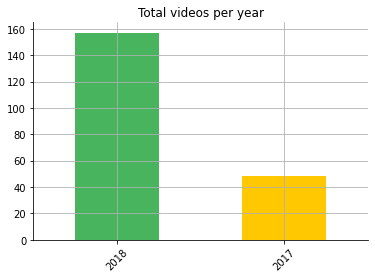

In [ ]:
year = df.groupby("trending_date")["views"].sum()
year = year.reset_index()
year_count = year.trending_date.dt.year.value_counts()
year_count.plot(kind="bar",color=["#48b55e","#ffc800"])
plt.xticks(rotation=45)
plt.title("Total videos per year")
sns.despine()
plt.grid(None)

### 2. Number of videos per month:

In [ ]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
num_m = [*range(1, 13)]
months_dict = {}

for key, i in zip(months, num_m):
  months_dict[i] = key

monthofyear = df.groupby('p_month').size().reset_index()
monthofyear['p_month'] = monthofyear['p_month'].map(months_dict)

Text(0, 0.5, 'Number of videos')

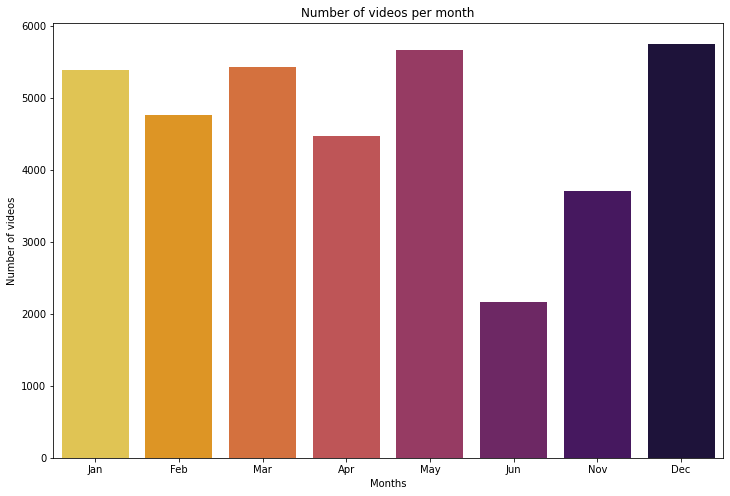

In [ ]:
#plot
plt.figure(figsize=(12, 8))
sns.barplot(x='p_month', y=0, data=monthofyear, palette='inferno_r')

plt.title("Number of videos per month")
plt.xlabel("Months")
plt.ylabel("Number of videos")

Most of the videos are uploaded in the month of December.

### 3. Number of videos per day of a week

In [ ]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
days_dict = {}
num = [*range(7)]

for key, i in zip(days, num):
  days_dict[i] = key

dayofweek = df.groupby('p_day').size().reset_index()
dayofweek['p_day'] = dayofweek['p_day'].map(days_dict)

Text(0, 0.5, 'Number of videos')

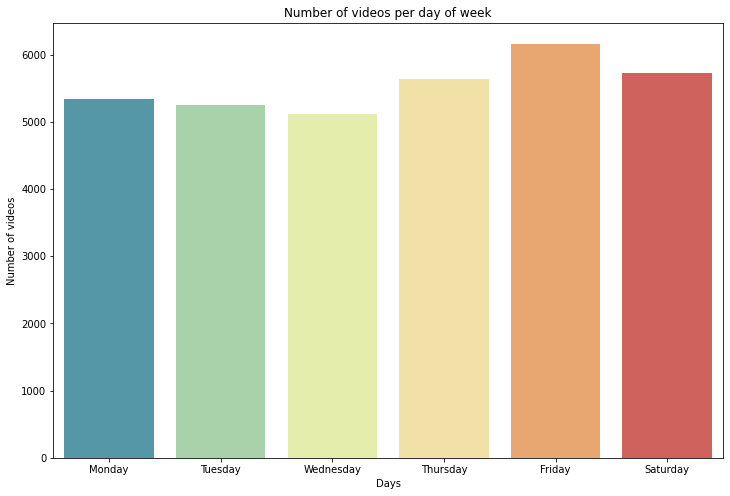

In [ ]:
#plot
plt.figure(figsize=(12, 8))
sns.barplot(x='p_day', y=0, data=dayofweek, palette='Spectral_r')

plt.title("Number of videos per day of week")
plt.xlabel("Days")
plt.ylabel("Number of videos")


Plot shows that many Youtubers prefer to publish their videos in Friday

### 4. Number of vidos published Per hour:

In [ ]:
hours = df.groupby('p_hour').size()

Text(0, 0.5, 'Number of videos')

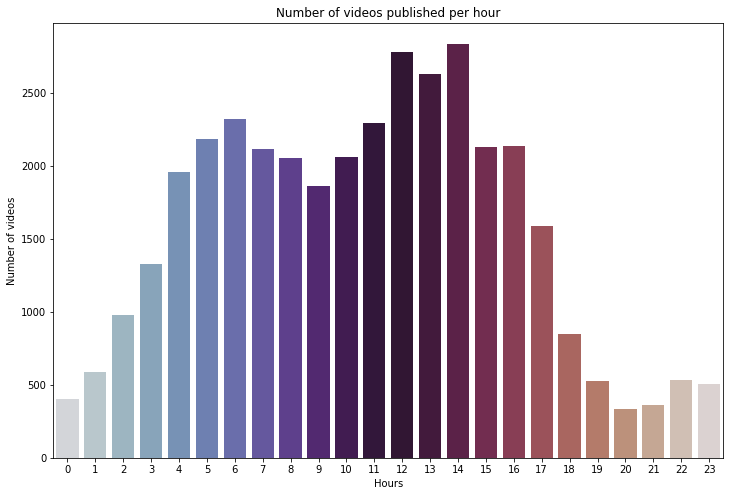

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x=hours.index.values, y=hours.values, palette="twilight")

plt.title("Number of videos published per hour")
plt.xlabel("Hours")
plt.ylabel("Number of videos")

Graph shows that most of the videos are uploaded during daytime. The peak hours are during 12PM to 2PM.

### 5. Which category gets most likes:

Text(0, 0.5, 'Number of Likes')

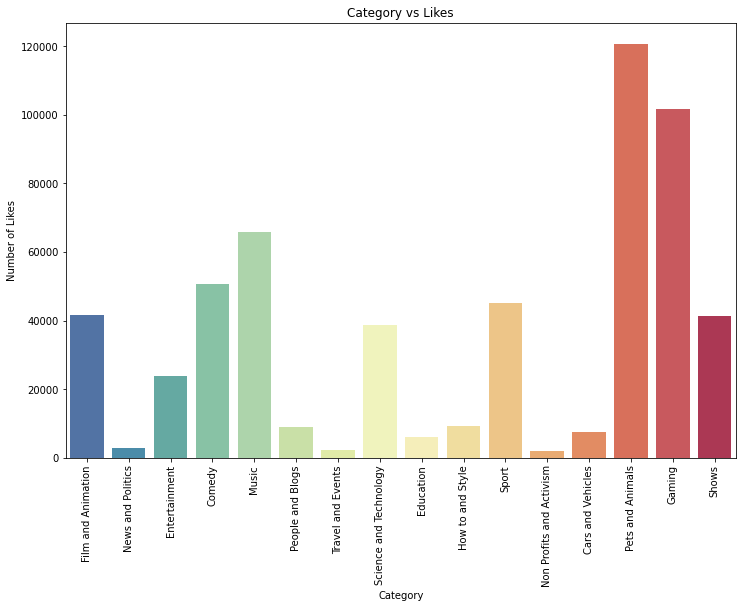

In [ ]:
plt.figure(figsize=(12, 8))
g = sns.barplot(x='category_name', y='likes', data=df, palette='Spectral_r', ci=0)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.title("Category vs Likes")
plt.xlabel("Category")
plt.ylabel("Number of Likes")

The graph shows that the category 'Pets and Animals' gets most of the likes followed by category 'Gaming'.

### 6. Which category gets most of the views:

Text(0, 0.5, 'Number of Views')

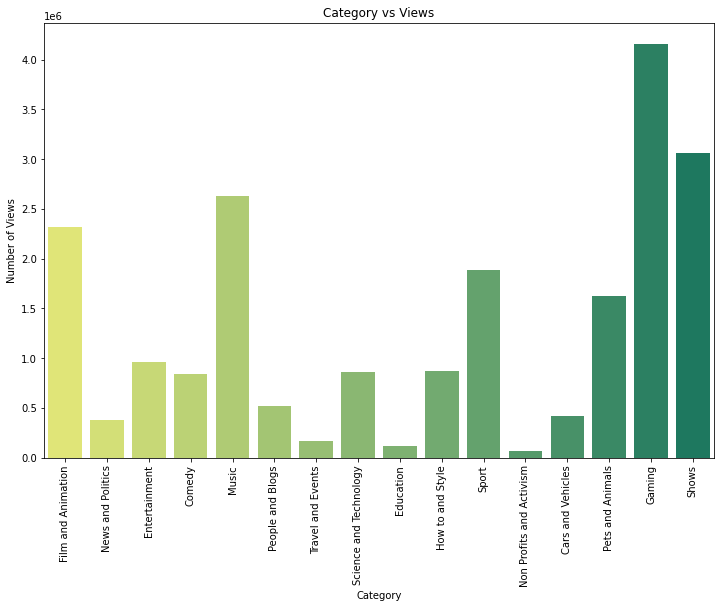

In [ ]:
plt.figure(figsize=(12, 8))
a = sns.barplot(x='category_name', y='views', data=df, palette='summer_r', ci=0)
a.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.title("Category vs Views")
plt.xlabel("Category")
plt.ylabel("Number of Views")

Thus, the category 'Gaming' gets highest number of views followed by categories 'Shows' and 'Music' .

### 7. Which category gets most of dislikes:

Text(0, 0.5, 'Number of dislikes')

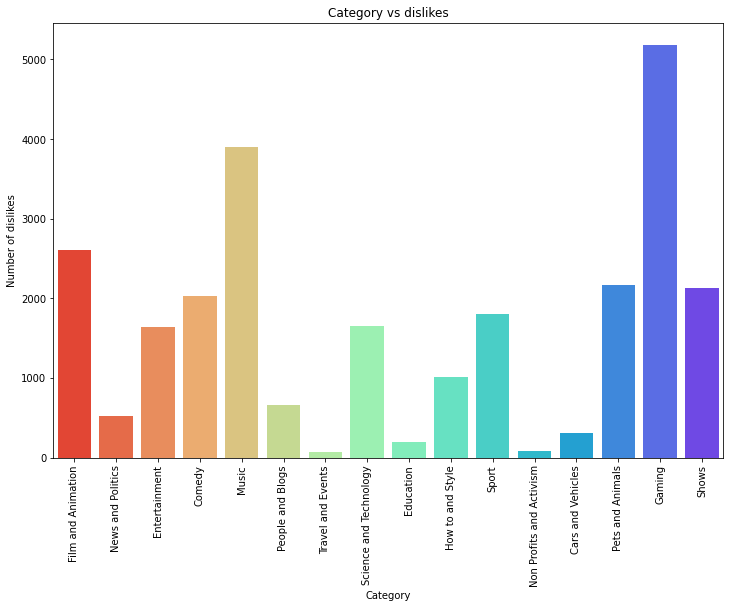

In [ ]:
plt.figure(figsize=(12, 8))
a =sns.barplot(x='category_name', y='dislikes', data=df, palette='rainbow_r', ci=0)
a.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.title("Category vs dislikes")
plt.xlabel("Category")
plt.ylabel("Number of dislikes")

The category 'Gaming' gets most of the dislikes followed by category 'Music'.

### 8. The channels with highest number of trending videos

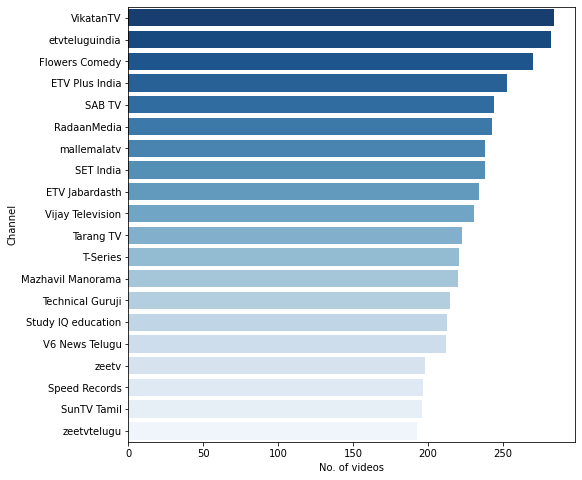

In [ ]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf, palette='Blues_r', ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

The channels 'VikatanTV', 'etvteluguindia' and 'Flowers Comedy' have highest number of trending videos.

### 9. The Views, likes, dislikes distribuition by category_name:

In [ ]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

Category Name count
Entertainment        16712
News and Politics     5241
Music                 3858
Comedy                3429
People and Blogs      2624
Name: category_name, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


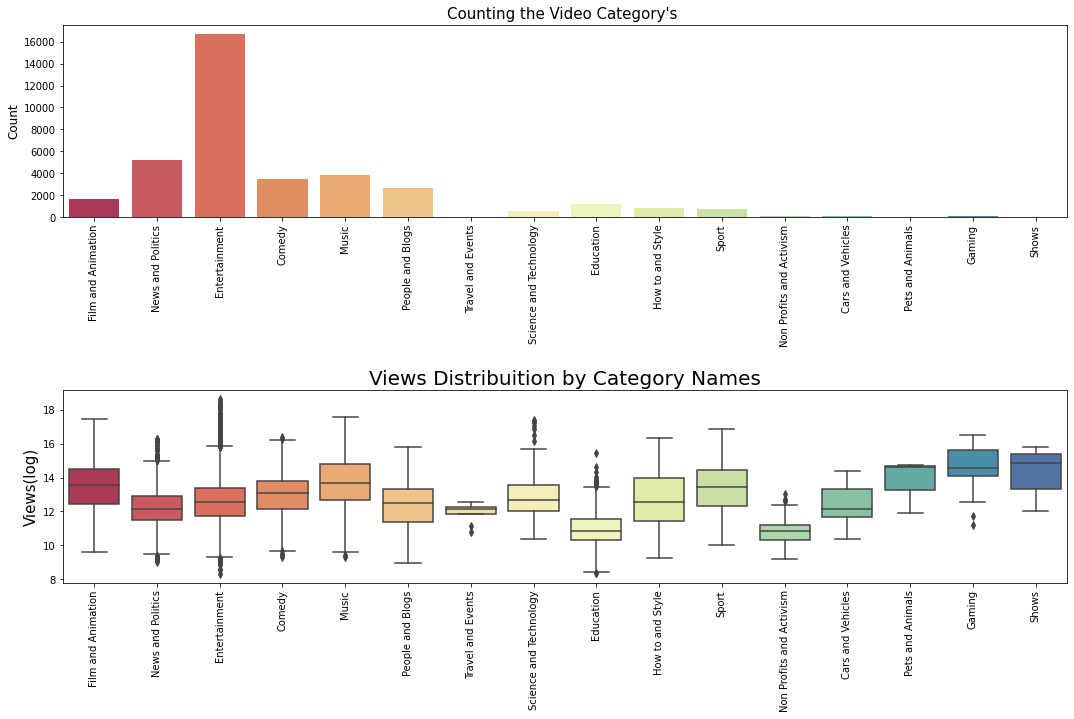

In [ ]:
print("Category Name count")
print(df.category_name.value_counts()[:5])

plt.figure(figsize = (18,10))

plt.subplot(211)
g = sns.countplot('category_name', data=df, palette="Spectral")
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='views_log', data=df, palette="Spectral")
g1.set_xticklabels(g.get_xticklabels(),rotation=90)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

### 10. Visualizing another variables:

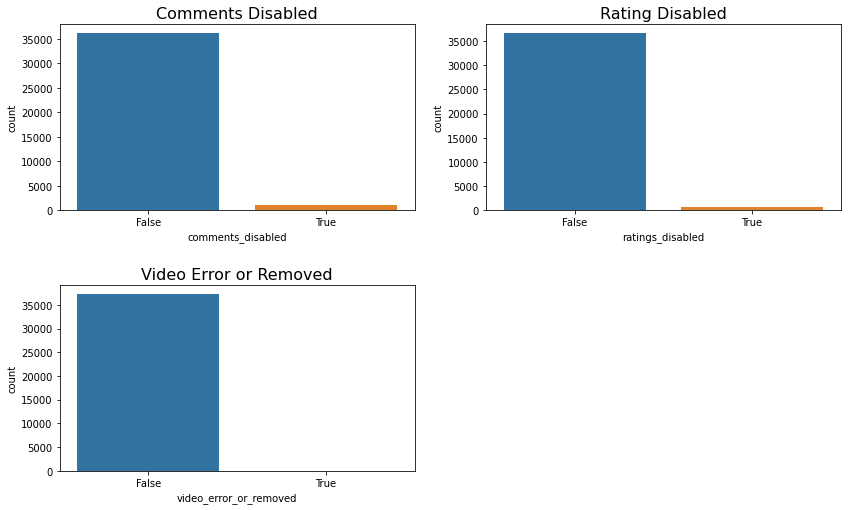

In [ ]:
plt.figure(figsize = (14,8))
plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.subplot(2,2,1)
g = sns.countplot(x='comments_disabled', data=df)
g.set_title("Comments Disabled", fontsize=16)

plt.subplot(2,2,2)
g1 = sns.countplot(x='ratings_disabled', data=df)
g1.set_title("Rating Disabled", fontsize=16)

plt.subplot(2,2,3)
g2 = sns.countplot(x='video_error_or_removed', data=df)
g2.set_title("Video Error or Removed", fontsize=16)
plt.show()

### 11. Correlation and Heatmap:

Correlation table for the variables.

In [ ]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,p_month,p_day,p_hour,likes_log,views_log,dislikes_log,comment_log
category_id,1.000000,-0.183215,-0.127600,-0.042450,-0.036223,0.038928,0.057953,-0.053865,0.014693,0.010071,0.059440,-0.264876,-0.284333,-0.219776,-0.188833
views,-0.183215,1.000000,0.850096,0.543294,0.674195,-0.034227,-0.034364,0.004976,-0.010850,-0.055840,-0.008673,0.427852,0.575829,0.463550,0.416855
likes,-0.127600,0.850096,1.000000,0.494560,0.780514,-0.045624,-0.040741,0.028464,-0.008785,-0.050749,0.014808,0.472480,0.500241,0.451609,0.466151
dislikes,-0.042450,0.543294,0.494560,1.000000,0.708125,-0.011821,-0.015136,0.002985,0.012920,-0.018872,0.012359,0.160747,0.196467,0.206539,0.168611
comment_count,-0.036223,0.674195,0.780514,0.708125,1.000000,-0.032860,-0.024210,0.015771,0.007750,-0.036164,0.012162,0.307226,0.317767,0.306039,0.342461
comments_disabled,0.038928,-0.034227,-0.045624,-0.011821,-0.032860,1.000000,0.354718,-0.003132,-0.017372,-0.003540,-0.033311,-0.253330,-0.061963,-0.170865,-0.469315
ratings_disabled,0.057953,-0.034364,-0.040741,-0.015136,-0.024210,0.354718,1.000000,-0.002508,-0.017296,-0.021103,-0.038417,-0.517629,-0.083725,-0.467034,-0.204890
video_error_or_removed,-0.053865,0.004976,0.028464,0.002985,0.015771,-0.003132,-0.002508,1.000000,-0.005988,0.018124,0.014432,0.025684,0.017552,0.020835,0.027921
p_month,0.014693,-0.010850,-0.008785,0.012920,0.007750,-0.017372,-0.017296,-0.005988,1.000000,0.010436,0.012248,-0.060156,-0.093671,-0.075663,-0.054090
p_day,0.010071,-0.055840,-0.050749,-0.018872,-0.036164,-0.003540,-0.021103,0.018124,0.010436,1.000000,0.016748,-0.010812,-0.051528,-0.023588,-0.023521


Visualizing the correlation using Heatmap:

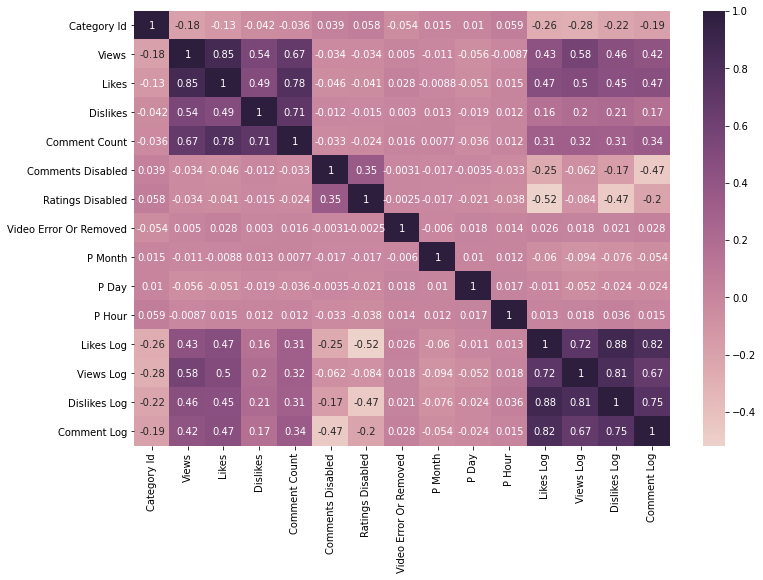

In [ ]:
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(12,8))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

The columns likes and views are highly correlated.

### 12. Most Common words in titles of the videos:

30 most Common words:

In [ ]:
t_words = list(df["title"].apply(lambda x: x.split()))

t_words = [x for y in t_words for x in y]
Counter(t_words).most_common(30)

[('|', 41986),
 ('-', 15777),
 ('2018', 6790),
 ('Episode', 4162),
 ('||', 3713),
 ('Full', 1940),
 ('The', 1890),
 ('Movie', 1854),
 ('Song', 1836),
 ('2017', 1693),
 ('Telugu', 1676),
 ('News', 1613),
 ('&', 1601),
 ('Video', 1594),
 ('Latest', 1437),
 ('Official', 1392),
 ('Trailer', 1306),
 ('to', 1306),
 (':', 1293),
 ('in', 1248),
 ('Songs', 1149),
 ('2', 1143),
 ('New', 1137),
 ('May', 1075),
 ('Punjabi', 1037),
 ('TV', 1018),
 ('की', 986),
 ('ETV', 968),
 ('on', 940),
 ('of', 940)]

### 13. Wordcloud

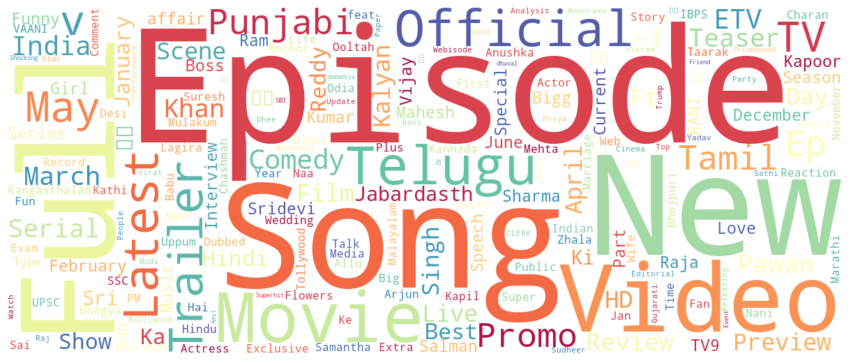

In [ ]:
wc = wordcloud.WordCloud(width=1200, height=500, collocations=False, background_color="white", 
                         colormap="Spectral").generate(" ".join(t_words))

plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")